<a href="https://colab.research.google.com/github/ABSHYabhi/Business-Case-Netflix_-Data_Exploration_and_Visualisation-/blob/main/Netflix_(Data_Exploration_and_Visualisation)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center><ins>Business Case: "Netflix" - Data Exploration and Visualisation</ins></center>


**<ins>Dataset Description:</ins>**       
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


**<ins>Dataset:</ins>**        
The dataset provided consists of a list of all the TV shows/movies available on Netflix:
* **Show_id:** Unique ID for every Movie / Tv Show
* **Type:** Identifier - A Movie or TV Show
* **Title:** Title of the Movie / Tv Show
* **Director:** Director of the Movie
* **Cast:** Actors involved in the movie/show
* **Country:** Country where the movie/show was produced
* **Date_added:** Date it was added on Netflix
* **Release_year:** Actual Release year of the movie/show
* **Rating:** TV Rating of the movie/show
* **Duration:** Total Duration - in minutes or number of seasons
* **Listed_in:** Genre
* **Description:** The summary description

**<ins>Dataset Link:</ins>**       
https://drive.google.com/file/d/1mgto6U6ukqFlpod_ULNcX2tqtiFhUpN7/view?usp=drive_link


# **(1) Defining Problem Statement and Analyzing Basic Metrics**
***

The main objective of this project is to analyze the dataset of movies and TV shows available on **Netflix** and generate insights to help **Netflix** decide which type of content to produce and how to grow the business in different countries. The analysis should be data-driven, focusing on basic metrics and visualizations to support the findings.

# **(2) Import libraries and Load the dataset**
***

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings & make code more representable
import warnings
warnings.filterwarnings("ignore")

In [144]:
# Load netflix.csv dataset into a pandas dataFrame
url = "https://drive.google.com/file/d/1mgto6U6ukqFlpod_ULNcX2tqtiFhUpN7/view?usp=drive_link"
!gdown 1mgto6U6ukqFlpod_ULNcX2tqtiFhUpN7
df = pd.read_csv("netflix.csv")

Downloading...
From: https://drive.google.com/uc?id=1mgto6U6ukqFlpod_ULNcX2tqtiFhUpN7
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 29.4MB/s]


In [145]:
# shows the top 5 records of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **(3) Data Exploration and Pre-processing**
***

### **Check basic metrics and data types**

Understanding the structure of the dataset, including the number of rows and columns, and the data types of each attribute. It is a crucial step in **data exploration.**

In [146]:
df.shape

(8807, 12)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Observations:**
* The dataset contains 8807 rows and 12 columns.
* It is evident that columns such as "show_id", "type", "title", "director", "cast", "country", "date_added", "rating", "duration", "listed_in", and "description" hold string values, which are represented with the **"object"** datatype in this dataframe.
* The only column with the **"integer"** datatype appears to be "release_year".

In [148]:
#3 Describing the statistical summary of numerical type data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Observations:**     
* 25% of the tolal data belongs to year 1925-2013
* 75% of the tolal data belongs to year 2013-2021
* In an overall, the dataframe consists of release year starting from 1925 until the year 2021

**Insight:**
* The **Netflix** is still having old data and should add latest Movies and TV shows to attract more customers as well as retain the existing once.

### **Check for missing values**

This is both a **data cleaning** and **data preprocessing** step. Identifying and handling missing values is considered **data cleaning** since it involves addressing the issue of incomplete data. Depending on the extent of missing data, you may need to decide how to handle it, either by imputing values or removing the affected rows/columns. Additionally, it is also a **data preprocessing** step since having missing values can impact the effectiveness of subsequent analyses, and addressing them helps ensure the data is in a suitable form for analysis.

In [149]:
# Display the count of missing values for each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


 **Missing values** in "director", "cast", "country", date_added", "rating" and "duration" columns.

In [150]:
# Calculate the missing values percentage for each column and round to two decimal places
missing_values_percentage = (df.isnull().mean() * 100).round(2)
missing_values_percentage.name = 'Missing Values Percentage'
missing_values_percentage



,Missing Values Percentage
show_id,0.00
type,0.00
title,0.00
director,29.91
cast,9.37
country,9.44
date_added,0.11
release_year,0.00
rating,0.05
duration,0.03


**Observations:**
* We can see that **around 30%** of the "director" columns value are missing and hence we cannot drop this much data. We will fill these columns with "Unknown"
* Likewise we have "cast" and "country" columns having **almost 10%** data of missing values.

### **Handling null values**

In [151]:
# Handling null values for categorical variables
cat_columns = ['cast', 'director', 'country', 'rating']
for column in cat_columns:
    df[column].fillna(column + ' is Unknown', inplace=True)


In [153]:
# Handling null values for continuous variables
cont_columns = ['duration']
for column in cont_columns:
    df[column].fillna(0, inplace=True)

In [154]:
# Display the count of missing values for each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,0


**Observations:**
* We still have some **missing values** in the "date_added" column. We’ll remove these rows with missing "date_added" values when we perform the analysis involving the date column.

### **Unnesting columns**

**Unnesting** is a data preprocessing technique used to convert nested data structures into a flat format. This process is often necessary when dealing with data that contains lists, arrays, or other nested structures within a single column. By **unnesting**, you transform these complex structures into a more traditional tabular format, making it easier to analyze and manipulate the data.

In [155]:
#Using Direct Assignment and explode to unnest

# Unnesting "cast" column
df['cast'] = df['cast'].str.split(', ')
df = df.explode('cast')

# Unnesting "director" column
df['director'] = df['director'].str.split(', ')
df = df.explode('director')

# Unnesting "country" column
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Now, the "cast," "director," & "country" columns are unnested, & each row contains a single element in those columns...

In [156]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast is Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director is Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,director is Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,director is Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,director is Unknown,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**Observations:**    
* The "cast", "director", and "country" columns has been unnested due to which we now have a total number of **89382 rows with 12 columns** in this dataframe.

### **Convert categorical attributes to 'category' data type**

Converting categorical attributes to the 'category' data type is a **data preprocessing** step. By doing so, you are optimizing the memory usage and potentially speeding up certain operations when dealing with categorical data.

In [157]:
# Converting the columns 'type', 'country', and 'rating' in the dataframe 'df' to the 'category' data type
df['type'] = df['type'].astype('category')
df['country'] = df['country'].astype('category')
df['rating'] = df['rating'].astype('category')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       89382 non-null  object  
 1   type          89382 non-null  category
 2   title         89382 non-null  object  
 3   director      89382 non-null  object  
 4   cast          89382 non-null  object  
 5   country       89382 non-null  category
 6   date_added    89313 non-null  object  
 7   release_year  89382 non-null  int64   
 8   rating        89382 non-null  category
 9   duration      89382 non-null  object  
 10  listed_in     89382 non-null  object  
 11  description   89382 non-null  object  
dtypes: category(3), int64(1), object(8)
memory usage: 7.2+ MB


**Observations:**    
* The "type", "country", "rating" columns datatype has been corrected to **"category"** in this dataframe.


### **Convert date and time attributes to 'date_time' data type**

Converting date and time attributes to the 'date_time' data type is a **data preprocessing** step.

In [159]:
# Convert 'date_added' column to datetime data type
df['date_added'] = pd.to_datetime(df['date_added'])

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [160]:
# As error message suggested above, stripped any leading or trailing whitespace in the date_added column.
df['date_added'] = df['date_added'].str.strip()
#Tried again to convert 'date_added' column to datetime data type
df['date_added'] = pd.to_datetime(df['date_added'])

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       89382 non-null  object        
 1   type          89382 non-null  category      
 2   title         89382 non-null  object        
 3   director      89382 non-null  object        
 4   cast          89382 non-null  object        
 5   country       89382 non-null  category      
 6   date_added    89313 non-null  datetime64[ns]
 7   release_year  89382 non-null  int64         
 8   rating        89382 non-null  category      
 9   duration      89382 non-null  object        
 10  listed_in     89382 non-null  object        
 11  description   89382 non-null  object        
dtypes: category(3), datetime64[ns](1), int64(1), object(7)
memory usage: 7.2+ MB


**Observations:**   
* The "date_added" column's datatype has been updated to the right **"date_time**" format in this dataframe.
* The "type", "country", "rating" columns datatype has been corrected to **"Category"**.
* The column "release_year" seem to be having the **"integer**" datatype
* Rest of the columns contain string values, which are represented using the **"object"** datatype in this dataframe.

### **Convert numeric attributes to 'int' data type**

Converting numeric attributes to the 'integer' data type is a **data preprocessing** step.

In [162]:
# Custom function to convert duration to numeric
def convert_duration(duration):
    if 'Season' in str(duration):
        return int(str(duration).split()[0])  # Extract the numeric value for 'Seasons'
    return int(str(duration).replace(' min', ''))  # Convert 'min' entries to integers

In [163]:
# Convert 'duration' column to numeric using the custom function
df['duration'] = df['duration'].apply(convert_duration)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       89382 non-null  object        
 1   type          89382 non-null  category      
 2   title         89382 non-null  object        
 3   director      67445 non-null  object        
 4   cast          88192 non-null  object        
 5   country       83961 non-null  category      
 6   date_added    89313 non-null  datetime64[ns]
 7   release_year  89382 non-null  int64         
 8   rating        89344 non-null  category      
 9   duration      89379 non-null  object        
 10  listed_in     89382 non-null  object        
 11  description   89382 non-null  object        
dtypes: category(3), datetime64[ns](1), int64(1), object(7)
memory usage: 7.2+ MB


# **(4) Data Analysis**
***

### **(Q1) Find the counts of each categorical variable both using graphical and non-graphical analysis.**

To perform both **non-graphical** and **graphical analysi**s to find the counts of each categorical variable, you can use the **value_counts()** method for **non-graphical analysis** and the **countplot()** function from the **seaborn** library for **graphical analysis**.

#### **Non-Graphical Analysis**

**Non-graphical analysis** refers to the exploration and examination of data without using visualizations. We go through each categorical column and use the **value_counts()** method to get the counts of each category in that column.

In [164]:
cat_columns=['type','rating','country']

In [165]:
# Non-graphical analysis (value counts of each category for the given column)
for column in cat_columns:
    print(df[column].value_counts(), "\n")
    print("\n--- --- --- --- --- --- --- --- --- ---")

type
Movie      65346
TV Show    24036
Name: count, dtype: int64 


--- --- --- --- --- --- --- --- --- ---
rating
TV-MA                29860
TV-14                17437
R                    12865
PG-13                 7814
TV-PG                 6356
PG                    5182
TV-Y7                 4073
TV-Y                  2745
TV-G                  1329
G                      878
NR                     676
NC-17                   55
TV-Y7-FV                39
rating is Unknown       38
UR                      32
74 min                   1
84 min                   1
66 min                   1
Name: count, dtype: int64 


--- --- --- --- --- --- --- --- --- ---
country
United States         30471
India                  8537
United Kingdom         5713
country is Unknown     5421
Canada                 3946
                      ...  
Vatican City              1
Samoa                     1
Kazakhstan                1
Palestine                 1
Panama                    1
Name: count, L

#### **Graphical Analysis**

In **Graphical Analysis**, we loop through each **categorical column** and creating a count plot using **seaborn's countplot()** function. Each count plot visually displays the counts of each category in a **bar chart**, showing the distribution of categorical data in the DataFrame.

In [166]:
# Categorical variables to analyze graphically
cat_columns = ['type', 'rating']

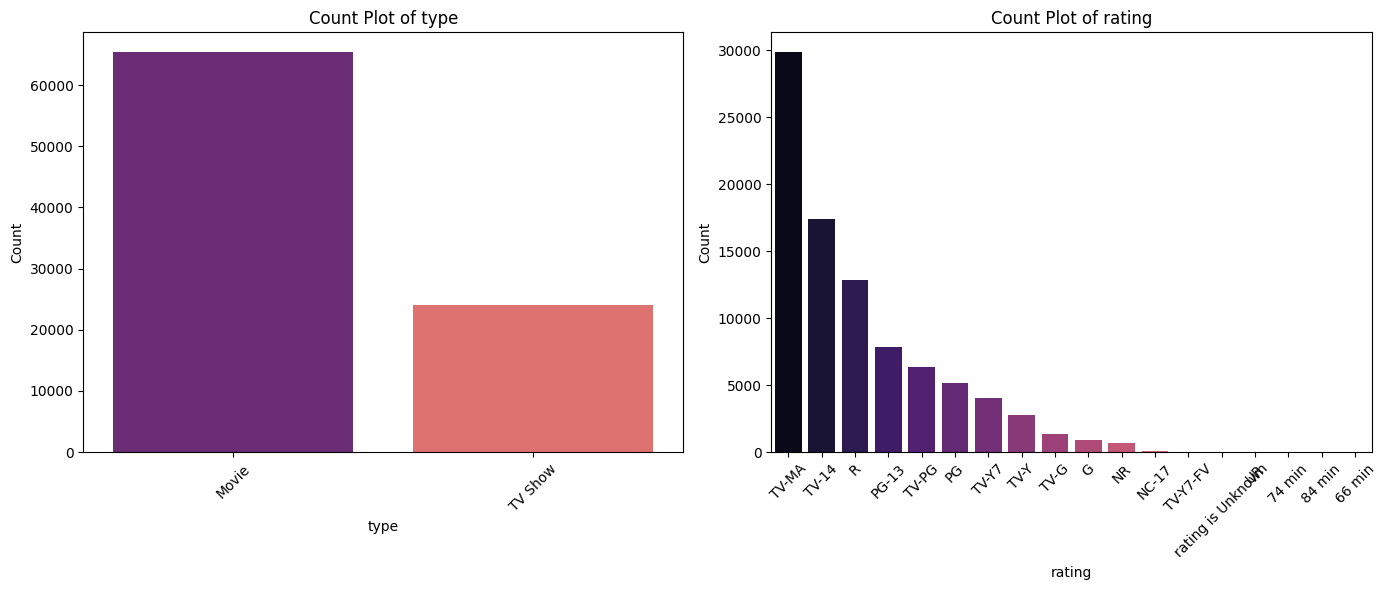

In [167]:
# Create subplots for graphical analysis
fig, axes = plt.subplots(1, len(cat_columns), figsize=(14, 6))


# Graphical analysis for each categorical variable
for i, column in enumerate(cat_columns):
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[i], palette='magma')
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Observations:**

* The **count plot** for the **'type'** variable shows that there are two types of content: **'Movie'** and **'TV Show'**. It appears that the dataset contains **more movies than TV shows**.
* As per the **'rating' Count Plot**, we can see the distribution of different content ratings. The **most common rating** seems to be 'TV-MA', followed by 'TV-14' and 'R'. There are also several other ratings with varying frequencies.

**Recommendations:**

* **Content Balance:** As there are **more movies than TV shows** in the dataset, content creators could **focus on producing a balanced mix of both types** to cater to **diverse audience preferences**.
* **Targeting Different Age Groups:** Considering that **'TV-MA' and 'TV-14**' are the **most common content ratings**, it suggests that the audience for **Netflix** content primarily consists of adults and teenagers. However, there is still a significant viewership for other ratings as well. To cater to a broader audience, producing **content for different age groups** (e.g., children-friendly shows, family-oriented content) could be beneficial.

### **(Q2) Comparison of TV shows vs. Movies**

To perform a **comparison of TV shows vs. Movies** in terms of the number of titles produced in each country.

In [168]:
# Filter movies and TV shows separately
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

In [169]:
# Group and count unique movie titles for each country
movie_counts_by_country = movies_df.groupby('country')['title'].nunique().reset_index()

# Rename the 'title' column to 'movie_count' to make it more logical
movie_counts_by_country.rename(columns={'title': 'movie_count'}, inplace=True)

# Sort the values based on the movie count in descending order
movie_counts_by_country = movie_counts_by_country.sort_values(by='movie_count', ascending=False)

# Select top 10 countries with the most movies
top_10_movie_countries = movie_counts_by_country.head(10)

# Display the result
print("Top 10 countries with the most Movies:\n")
print(top_10_movie_countries)


Top 10 countries with the most Movies:

                country  movie_count
119       United States         2751
47                India          962
117      United Kingdom          532
127  country is Unknown          440
22               Canada          319
38               France          303
40              Germany          182
105               Spain          171
55                Japan          119
25                China          114


In [170]:
# Group and count unique TV show titles for each country
tv_show_counts_by_country = tv_shows_df.groupby('country')['title'].nunique().reset_index()

# Rename the 'title' column to 'tv_show_count' to make it more logical
tv_show_counts_by_country.rename(columns={'title': 'tv_show_count'}, inplace=True)

# Sort the values based on the TV show count in descending order
tv_show_counts_by_country = tv_show_counts_by_country.sort_values(by='tv_show_count', ascending=False)

# Select top 10 countries with the most TV shows
top_10_tv_show_countries = tv_show_counts_by_country.head(10)

# Display the result
print("Top 10 countries with the most TV shows:\n")
print(top_10_tv_show_countries)



Top 10 countries with the most TV shows:

                country  tv_show_count
119       United States            938
127  country is Unknown            391
117      United Kingdom            272
55                Japan            199
103         South Korea            170
22               Canada            126
38               France             90
47                India             84
111              Taiwan             70
7             Australia             66


### **(Q3) What is the best time to launch a TV show?**

To find the best time to launch a TV show or a movie, we will analyze the data separately for TV shows and movies to determine the best week and the best month for release. We will create new columns for week and month, then group the data accordingly to count the total number of TV shows and movies released in each week and each month.



In [172]:
df['date_added']

,date_added
0,2021-09-25
1,2021-09-24
1,2021-09-24
1,2021-09-24
1,2021-09-24
...,...
8806,2019-03-02
8806,2019-03-02
8806,2019-03-02
8806,2019-03-02


In [173]:
# Extract the week and month from the 'date_added' column
df['Week'] = df['date_added'].dt.isocalendar().week
df['Month'] = df['date_added'].dt.month

#For TV shows

In [174]:
# Filter TV shows
tv_shows_df = df[df['type'] == 'TV Show']

# Group and count TV shows by week
tv_shows_by_week = tv_shows_df.groupby('Week')['title'].count().reset_index()
tv_shows_by_week = tv_shows_by_week.sort_values(by='title', ascending=False)

# Group and count TV shows by month
tv_shows_by_month = tv_shows_df.groupby('Month')['title'].count().reset_index()
tv_shows_by_month = tv_shows_by_month.sort_values(by='title', ascending=False)

In [175]:
# Best week to launch a TV show
best_week = tv_shows_by_week['Week'].iloc[0]

# Best month to launch a TV show
best_month = int(tv_shows_by_month['Month'].iloc[0])

In [176]:
print(f"The best week to launch a TV show is Week {best_week}")
print(f"The best month to launch a TV show is Month {best_month}")

The best week to launch a TV show is Week 35
The best month to launch a TV show is Month 8


0


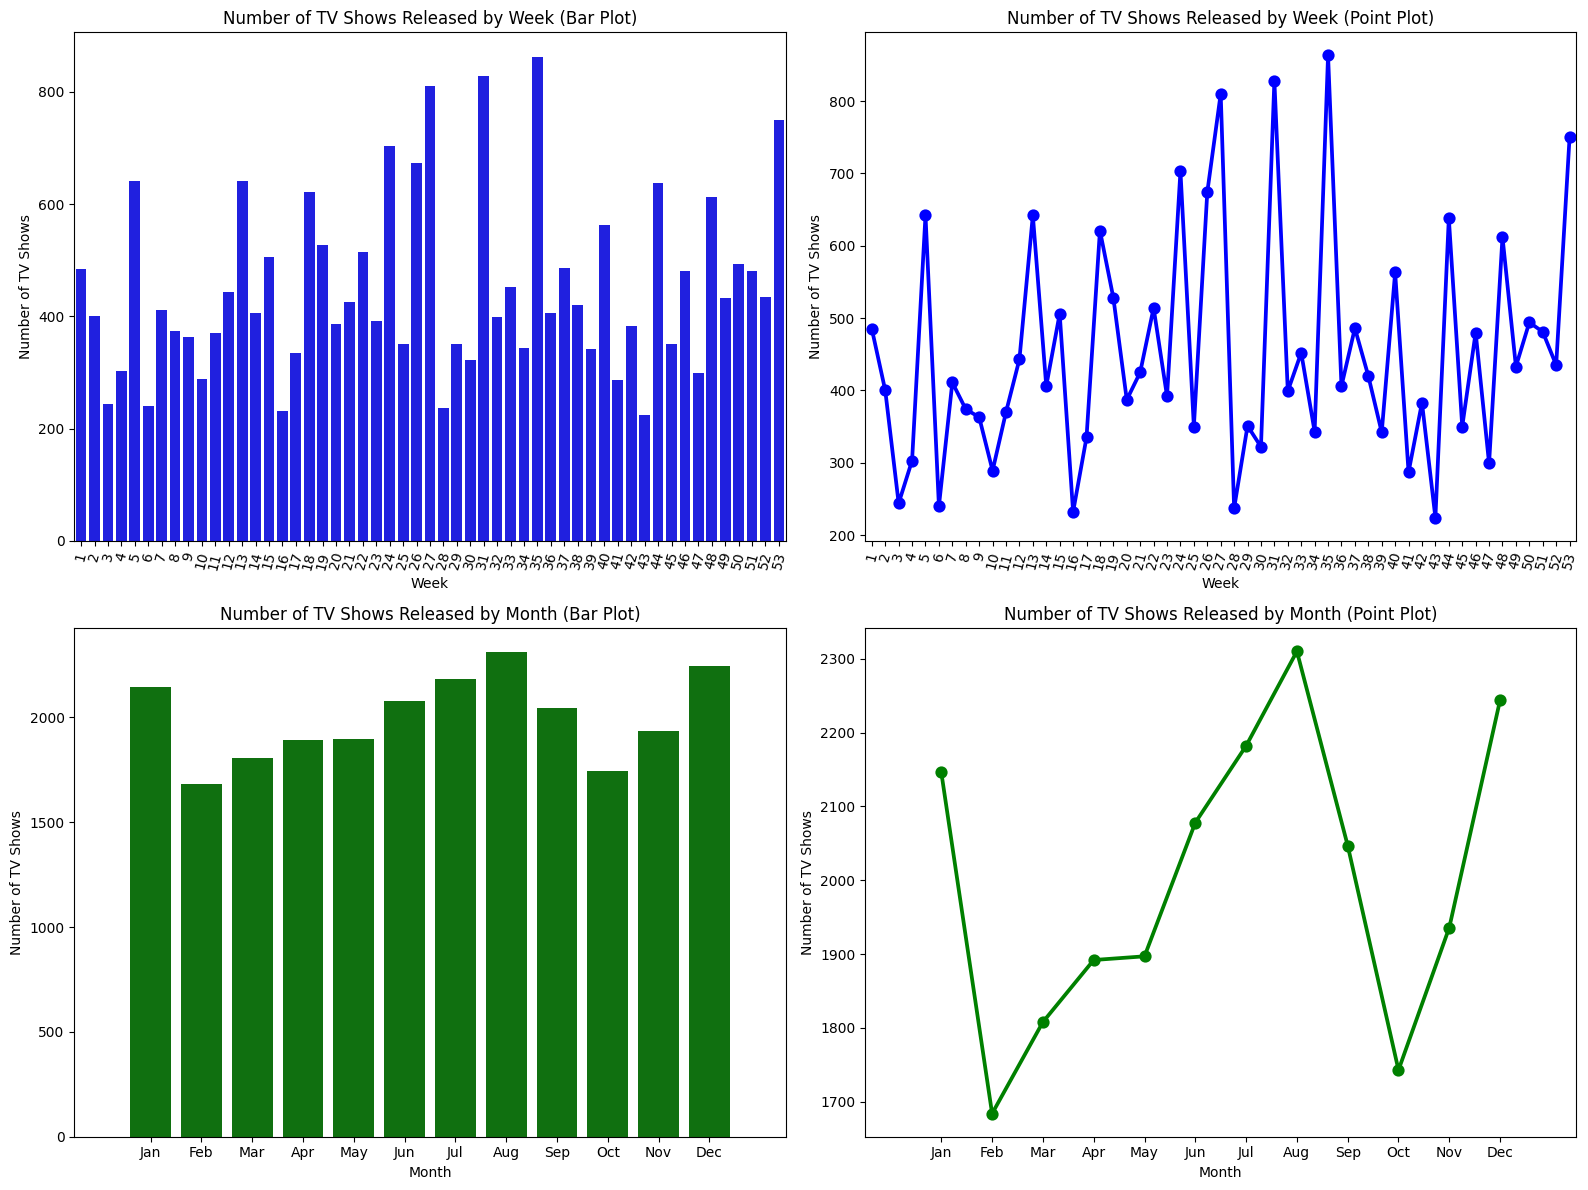

In [192]:
# Drop rows where 'date_added' is missing
df = df.dropna(subset=['date_added'])

# Create subplots with two rows
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Subplot for TV shows released by week (bar plot)
sns.barplot(data=tv_shows_by_week, x='Week', y='title', color='b', ax=axs[0, 0])
axs[0, 0].set_title('Number of TV Shows Released by Week (Bar Plot)')
axs[0, 0].set_xlabel('Week')
axs[0, 0].set_ylabel('Number of TV Shows')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=75)    # Rotate x-axis labels in the 0th row (bar plot)

# Subplot for TV shows released by week (point plot)
sns.pointplot(data=tv_shows_by_week, x='Week', y='title', color='b', ax=axs[0, 1])
axs[0, 1].set_title('Number of TV Shows Released by Week (Point Plot)')
axs[0, 1].set_xlabel('Week')
axs[0, 1].set_ylabel('Number of TV Shows')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=75)     # Rotate x-axis labels in the 0th row (point plot)

# Subplot for TV shows released by month (bar plot)
sns.barplot(data=tv_shows_by_month, x='Month', y='title', color='g', order=range(0, 14), ax=axs[1, 0])
axs[1, 0].set_title('Number of TV Shows Released by Month (Bar Plot)')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of TV Shows')
axs[1, 0].set_xticks(range(1, 13))
axs[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Subplot for TV shows released by month (point plot)
sns.pointplot(data=tv_shows_by_month, x='Month', y='title', color='g', order=range(0, 14), ax=axs[1, 1])
axs[1, 1].set_title('Number of TV Shows Released by Month (Point Plot)')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Number of TV Shows')
axs[1, 1].set_xticks(range(1, 13))
axs[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

#For Movies

In [195]:
# Extract the week and month from the 'date_added' column
df['Week'] = df['date_added'].dt.isocalendar().week
df['Month'] = df['date_added'].dt.month

# Filter Movies
movies_df = df[df['type'] == 'Movie']

# Group and count Movies by week
movies_by_week = movies_df.groupby('Week')['title'].count().reset_index()
movies_by_week = movies_by_week.sort_values(by='title', ascending=False)

# Group and count Movies by month
movies_by_month = movies_df.groupby('Month')['title'].count().reset_index()
movies_by_month = movies_by_month.sort_values(by='title', ascending=False)

# Best week to launch a Movie
best_week_movies = movies_by_week['Week'].iloc[0]

# Best month to launch a Movie
best_month_movies = int(movies_by_month['Month'].iloc[0])

# Output the results
print(f"The best week to launch a Movie is Week {best_week_movies}")
print(f"The best month to launch a Movie is Month {best_month_movies}")



The best week to launch a Movie is Week 1
The best month to launch a Movie is Month 7


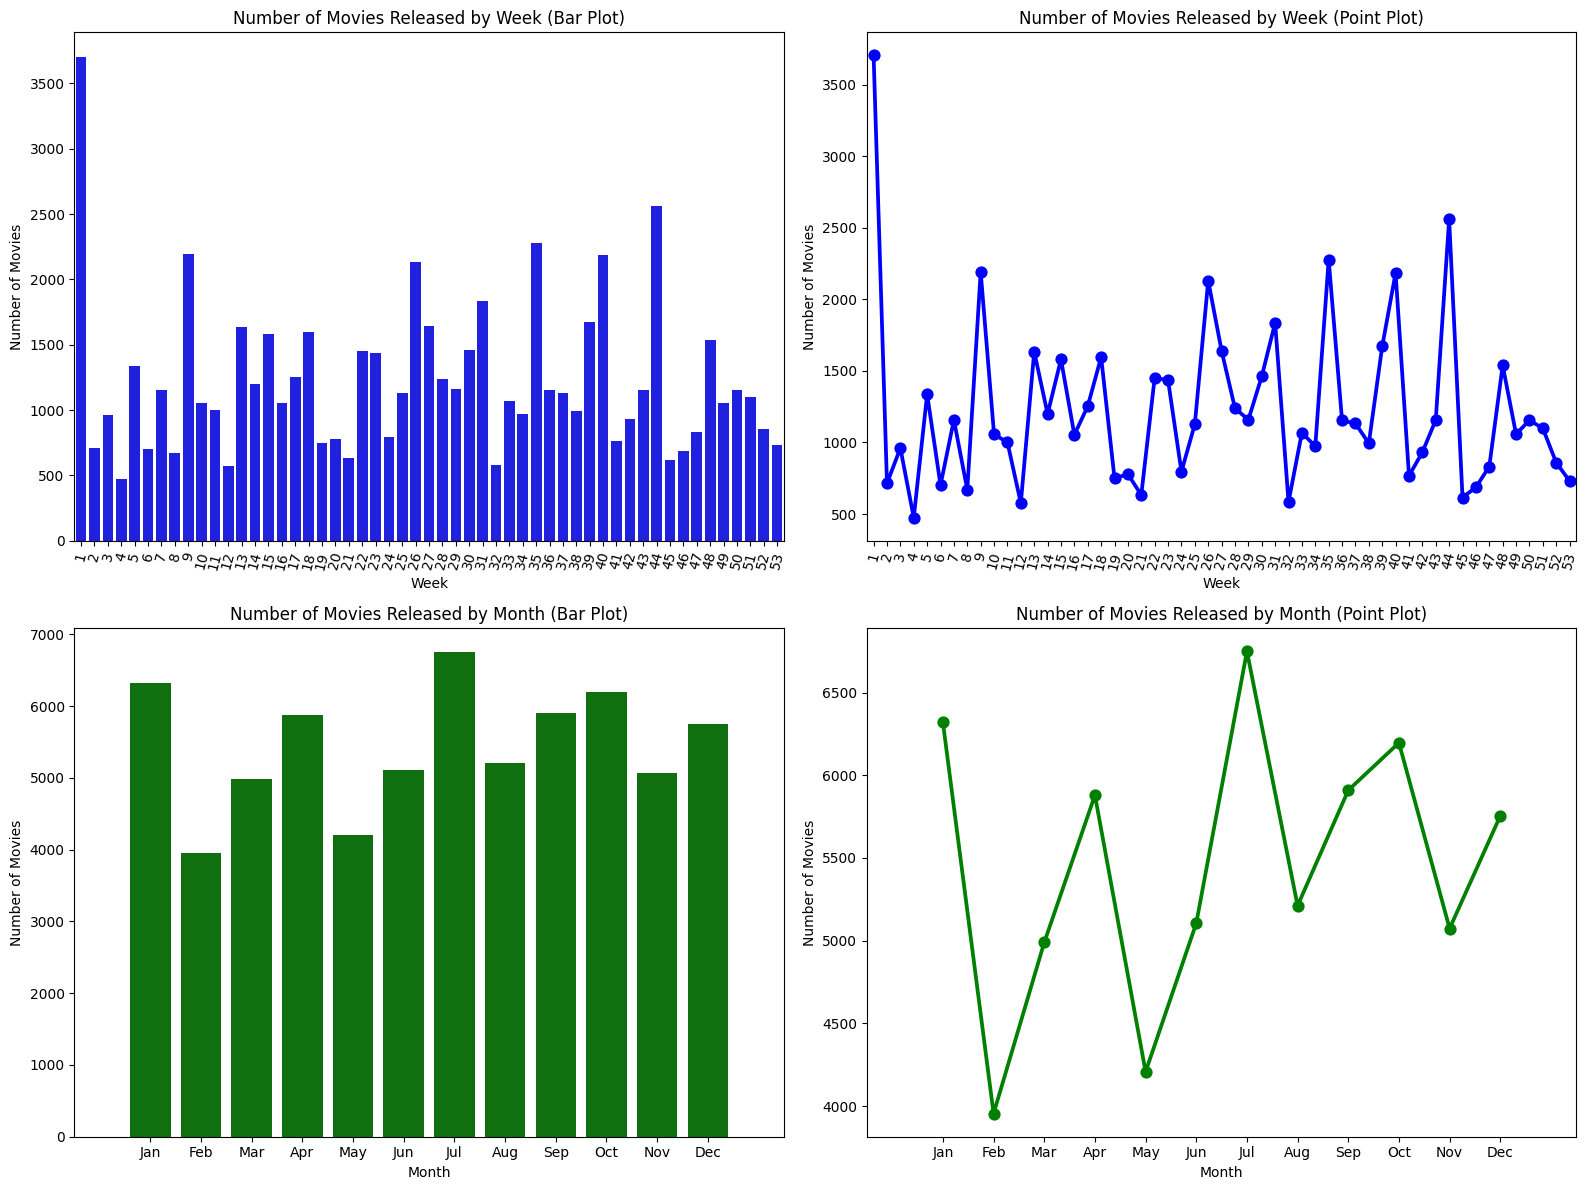

In [196]:
# Create subplots for Movies
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Subplot for Movies released by week (bar plot)
sns.barplot(data=movies_by_week, x='Week', y='title', color='b', ax=axs[0, 0])
axs[0, 0].set_title('Number of Movies Released by Week (Bar Plot)')
axs[0, 0].set_xlabel('Week')
axs[0, 0].set_ylabel('Number of Movies')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=75)

# Subplot for Movies released by week (point plot)
sns.pointplot(data=movies_by_week, x='Week', y='title', color='b', ax=axs[0, 1])
axs[0, 1].set_title('Number of Movies Released by Week (Point Plot)')
axs[0, 1].set_xlabel('Week')
axs[0, 1].set_ylabel('Number of Movies')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=75)

# Subplot for Movies released by month (bar plot)
sns.barplot(data=movies_by_month, x='Month', y='title', color='g', order=range(0, 14), ax=axs[1, 0])
axs[1, 0].set_title('Number of Movies Released by Month (Bar Plot)')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of Movies')
axs[1, 0].set_xticks(range(1, 13))
axs[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Subplot for Movies released by month (point plot)
sns.pointplot(data=movies_by_month, x='Month', y='title', color='g', order=range(0, 14), ax=axs[1, 1])
axs[1, 1].set_title('Number of Movies Released by Month (Point Plot)')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Number of Movies')
axs[1, 1].set_xticks(range(1, 13))
axs[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


**Observations:**

Based on the **bar plots** and **point plots**, we can make the following observations:

* The code identifies the **week with the highest number of TV show & Movie releases**, labeled as **"best_week"**. This **week** is displayed in both the **bar plot** and **point plot** for **TV shows released by week** and **Movies released by week** respectively.
* The code also identifies the **month with the highest number of TV show & Movie releases**, labeled as **"best_month"**. This **month** is displayed in both the **bar plot** and **point plot** for **TV shows released by month** and **Movies released by month** respectively.

**Insights:**


* **High Activity Period:** The identified **"best_week"** and **"best_month"** represent **periods of high activity** in terms of **TV show releases**. To capitalize on this, content creators and **Netflix** can plan to **launch their new TV shows during these weeks or months** to gain **maximum visibility and viewership**.
* **Seasonal Trends:** Analyzing the **TV show releases by month** can help identify potential **seasonal trends**. Content creators can align TV shows with specific themes or genres to match **seasonal preferences**, increasing the chances of success.
* **Avoiding Competitive Periods:** While launching TV shows during high activity periods is beneficial, it's essential to **avoid periods** when numerous popular TV shows are already being released. Competition can reduce visibility and affect viewership. Therefore, content creators can **strategize the release dates** to **avoid clashes with major TV show premieres**.


### **(Q4) Analysis of actors/directors of different types of shows/movies**

To analyze the **top 10 actors and directors** who have **appeared** in the **most movies or TV shows**, we will group the data by each actor and director separately and then count the number of unique titles (TV shows/movies) associated with each of them. We will create two separate bar plots to visualize the results.



In [180]:
# Filter out rows with 'unknown' cast
df_movies = df[df['type'] == 'Movie']
df_movies = df_movies[df_movies['cast'] != 'cast is Unknown']

# Grouping the data by actors and counting the number of unique movie titles for each actor
actor_movie_counts = df_movies.groupby('cast')['title'].nunique().reset_index()

# Sorting the actors in descending order of movie counts and selecting the top 10
top_10_actors_movies = actor_movie_counts.sort_values(by='title', ascending=False).head(10)


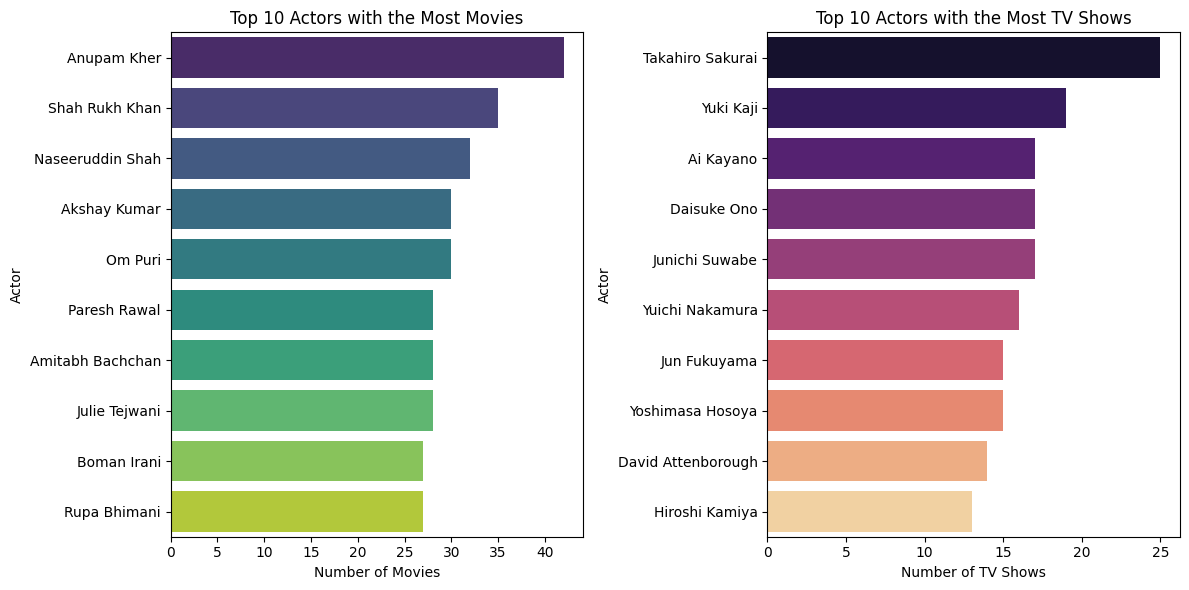

In [181]:
# Create a subplot for the top 10 actors with the most movies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_actors_movies, x='title', y='cast', palette='viridis')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')

# For actors who have appeared in the most TV shows:

# Filter out rows with 'unknown' cast
df_tv_shows = df[df['type'] == 'TV Show']
df_tv_shows = df_tv_shows[df_tv_shows['cast'] != 'cast is Unknown']

# Grouping the data by actors and counting the number of unique TV show titles for each actor
actor_tv_show_counts = df_tv_shows.groupby('cast')['title'].nunique().reset_index()

# Sorting the actors in descending order of TV show counts and selecting the top 10
top_10_actors_tv_shows = actor_tv_show_counts.sort_values(by='title', ascending=False).head(10)

# Create a subplot for the top 10 actors with the most TV shows
plt.subplot(1, 2, 2)
sns.barplot(data=top_10_actors_tv_shows, x='title', y='cast', palette='magma')
plt.title('Top 10 Actors with the Most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Actor')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Insights:**

Based on the **bar plots** for **actors** , we can make the following observations.

* **Top 10 Actors with the Most Movies:** We can see that the actor **"Anupam Kher"** with the **most movie appearances** is shown at the top of the plot along with the color palette 'viridis' which is used to differentiate the bars of camparision with other actors.
* **Top 10 Actors with the Most TV Shows:** The actor **"Takahiro Sakurai"** with the **most TV show appearances** is shown at the top of the plot. The color palette 'magma' is used to differentiate the bars.

In [182]:
# Filter out rows with 'unknown' directors
df_movies = df[df['type'] == 'Movie']
df_movies = df_movies[df_movies['director'] != 'director is Unknown']

# Grouping the data by directors and counting the number of unique movie titles for each director
director_movie_counts = df_movies.groupby('director')['title'].nunique().reset_index()

# Sorting the directors in descending order of movie counts and selecting the top 10
top_10_directors_movies = director_movie_counts.sort_values(by='title', ascending=False).head(10)

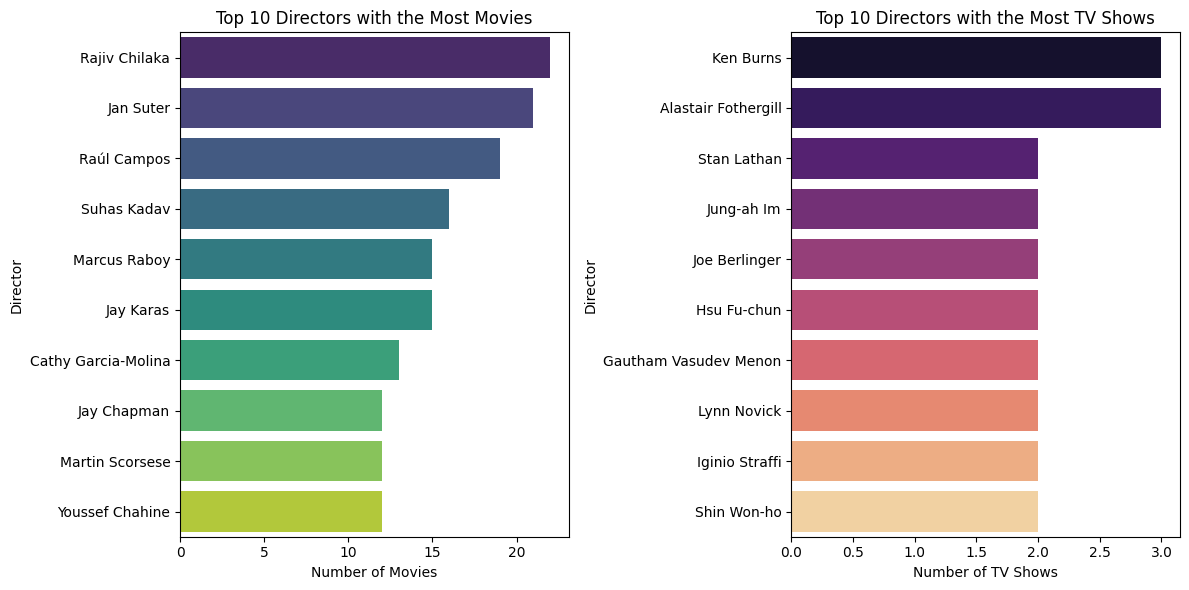

In [183]:
# Create a subplot for the top 10 directors with the most movies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_directors_movies, x='title', y='director', palette='viridis')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')

# For directors who have appeared in the most TV shows:

# Filter out rows with 'unknown' directors
df_tv_shows = df[df['type'] == 'TV Show']
df_tv_shows = df_tv_shows[df_tv_shows['director'] != 'director is Unknown']

# Grouping the data by directors and counting the number of unique TV show titles for each director
director_tv_show_counts = df_tv_shows.groupby('director')['title'].nunique().reset_index()

# Sorting the directors in descending order of TV show counts and selecting the top 10
top_10_directors_tv_shows = director_tv_show_counts.sort_values(by='title', ascending=False).head(10)

# Create a subplot for the top 10 directors with the most TV shows
plt.subplot(1, 2, 2)
sns.barplot(data=top_10_directors_tv_shows, x='title', y='director', palette='magma')
plt.title('Top 10 Directors with the Most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Director')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Observations:**

Based on the **bar plots** for **directors** , we can make the following observations.

* **Top 10 Directors with the Most Movies:** The director with the **most movie appearances** is **"Rajiv Chilaka"** as shown at the top of the plot along with the color palette 'viridis' which is used to differentiate the bars.
* **Top 10 Directors with the Most TV Shows:** Likewise, **"Ken Burns"** is the directors listed with the **most TV show appearances** is shown at the top of the plot. The color palette 'magma' is used to differentiate the bars.

**Recommendations for Actors & Directors:**

* **Leveraging Popular Actors & Directors:** Based on the analysis of **top actors & directors** with the **most movie and TV show appearances**, **Netflix** can consider **collaborations and partnerships with popular actors** or with **collaborating with top directors** to attract a broader audience. Including well-known actors or directors in original productions can lead to increased viewership.
* **Content Curation:** **Netflix** can curate **special collections featuring movies and TV shows** starring the **top actors and directed by the top directors**. This curated content can be promoted to subscribers based on their viewing preferences and history.

### **(Q5) Which genre movies are more popular or produced more**

**`Hint:`** We want you to apply the **word cloud** on the **genre** columns to know which kind of **genre** is produced

To identify which **genre** of **movies** is **more popular or produced mor**e, we can create a **word cloud** to visualize the frequency of different genres in the dataset. A **word cloud** is a **graphical representation of word frequencies, where the size of each word corresponds to its frequency** in the dataset.



In [184]:
from wordcloud import WordCloud

In [185]:
# Combine all the genres into a single string
all_genres = ' '.join(df['listed_in'])

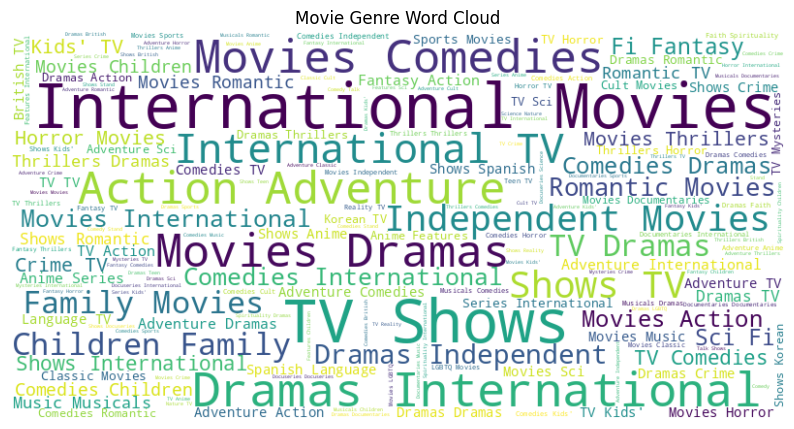

In [186]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Movie Genre Word Cloud')
plt.axis('off')
plt.show()

**Observations:**

* The provided code creates a **word cloud** visualization based on the **movie genres** available in the **Netflix** dataset. A **word cloud** here represents the **popularity or frequency of different movie genres**.

**Recommendations:**

* **Content Curation:** In this case we can see that dramas, actions, adventure, comedies and family movies are some of the most popular genres world wide. Hence, understanding the **most popular genres** can guide **Netflix** in curating their content to cater to **diverse audience preferences**.

### **(Q6) Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

**`Hint:`** We want you to get the difference between the columns having date added information and release year information and get the mode of difference. This will give an insight into what will be the better time to add in Netflix


In [187]:
# Since we only have 'release_year', create a full 'release_date' by assuming January 1st of that year
df['release_date'] = pd.to_datetime(df['release_year'].astype(str) + '-01-01', errors='coerce')

# Drop duplicates based on 'show_id' to ensure each movie/show is only counted once
df_unique = df.drop_duplicates(subset='show_id')

# Calculate the difference in days between 'date_added' and 'release_date' for unique movies/shows
df_unique['Days_to_add'] = (df_unique['date_added'] - df_unique['release_date']).dt.days

# Drop rows with missing 'Days_to_add' values
df_unique = df_unique.dropna(subset=['Days_to_add'])

# Find the mode of the difference in days (most frequent value)
mode_days = df_unique['Days_to_add'].mode()[0]

print(f"The most common number of days between release and the movie/show being added to Netflix is: {mode_days} days.")




The most common number of days between release and the movie/show being added to Netflix is: 334 days.


**Observations:**

The analysis indicates that the most common time span between the release of a movie or TV show and its addition to Netflix is approximately 334 days (~0.9 years).

**Recommendations:**

- Content Acquisition Strategy: Given that it often takes about 334 days for certain movies or TV shows to be added to Netflix after their initial release, Netflix should consider acquiring content sooner. This is particularly important for genres that are in high demand or trending, as this could help maintain relevance and attract more subscribers.

- Original Productions vs. Licensing: The identified timeline of 334 days highlights the potential licensing acquisition window for popular content. Netflix may benefit from balancing this by increasing the focus on original productions or securing early distribution rights for new releases. This approach will help ensure a continuous influx of fresh and appealing content on the platform.

- User Engagement: Understanding this timeline offers an opportunity for Netflix to enhance user engagement. Promoting the availability of previously released but now newly added titles can be a strategic move. Features like "New on Netflix" for rediscovered classics could effectively captivate subscribers’ interests.

#Netflix Dataset Analysis: **Final Recommendations**

Based on a thorough analysis of the Netflix dataset, we present the following actionable insights and recommendations to optimize content strategy, enhance viewership, and improve overall platform engagement:

- Content Diversity & Balance

  **Insights:** The analysis reveals that there are more movies than TV shows on the platform, and the most common content ratings are 'TV-MA' and 'TV-14', which cater to adult and teenage audiences.
  
  **Recommendations:**

    - Content Mix: To appeal to a broader audience, Netflix should aim for a balanced mix of both movies and TV shows, ensuring that various types of content are available for different audience segments.
    - Age Group Targeting: As 'TV-MA' and 'TV-14' dominate the content ratings, Netflix could expand its offerings to include more content targeting younger audiences, such as children-friendly and family-oriented shows.

- Optimal Content Release Time

  **Insights:**
  The analysis identified the best weeks and months to release TV shows, revealing periods of high activity and potential seasonal trends.

  **Recommendations:**

    - Strategic Releases: Plan content launches during these high activity periods to maximize visibility and viewer engagement.
    - Seasonal Themes: Tailor content releases to match seasonal preferences and trends, which could enhance the relevance of certain shows or genres during specific times of the year.
    - Avoiding Clashes: To prevent competition, carefully strategize release schedules to avoid launching new content alongside major shows or movies already scheduled for release.

- Collaborations with Popular Actors & Directors

  **Insights:**
Actors like Anupam Kher (movies) and Takahiro Sakurai (TV shows), and directors like Rajiv Chilaka (movies) and Ken Burns (TV shows) appear in the top 10 based on their prolific work on Netflix.

  **Recommendations:**

    - Star Power: Collaborate with these top actors and directors to leverage their popularity and expand viewership.
    - Curated Collections: Create curated collections or dedicated promotions around the most popular actors and directors, highlighting their work and attracting fans to these titles.

- Genre Focus

  **Insights:**
The word cloud analysis reveals that genres like drama, action, adventure, comedy, and family movies are among the most popular on Netflix.

  **Recommendations:**

    - Genre-Based Content Curation: Focus on acquiring or producing more content in these popular genres to meet audience demand. Regularly review genre trends to ensure content offerings stay aligned with viewer preferences.
- Country-Specific Content Production

  **Insights:**
  The analysis shows significant production volume in countries like the U.S., India, and the U.K. for both movies and TV shows.

  **Recommendations:**

    - Global Content Strategy: Prioritize acquiring or producing more content from these top-producing countries to satisfy international demand.
    - Regional Focus: Explore opportunities in emerging content markets to diversify offerings and attract new audiences from growing regions.

- Content Acquisition Timing

  **Insights:**
The average time span between a movie's release and its addition to Netflix is approximately 334 days.

  **Recommendations:**

    - Reduce Time Lag: Focus on reducing the acquisition time for recently released content, especially for popular and trending titles, to keep the platform fresh and relevant.

    - Early Acquisitions: Negotiate early distribution deals or increase emphasis on original productions to deliver fresh content to subscribers more quickly.

    - Promote Older Content: For older titles that are newly added, consider promoting them through features like "Rediscovered Classics" to reignite interest among subscribers.